In [1]:
from img_doc.document import Document
from img_doc.dataset import PubLayNetDataset
import matplotlib.pyplot as plt

2024-03-12 18:21:35.853074: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-12 18:21:36.380091: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-12 18:21:36.380303: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-12 18:21:36.466048: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-12 18:21:36.696544: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-12 18:21:36.697770: I tensorflow/core/platform/cpu_feature_guard.cc:1

In [2]:
pln_ds = PubLayNetDataset(r"/home/daniil/program/dataset/publaynet/", 
                          r"/home/daniil/program/dataset/tmp_publaynet/")

In [23]:
list_file = pln_ds.get_list_file_name()
list_file[:5]

['PMC3437971_00001.jpg',
 'PMC4631444_00001.jpg',
 'PMC5486610_00004.jpg',
 'PMC4422455_00003.jpg',
 'PMC5831887_00003.jpg']

In [24]:
doc = pln_ds.read_file(list_file[2])
page = doc.pages[0]

In [25]:
# from img_doc.image.segment_clusterizer import KMeanClusterizer
# from img_doc.image import ImageSegment

# doc = pln_ds.read_file("PMC5919984_00000.jpg")
# page = doc.pages[0]

true_label = [w.label for w in page.blocks]

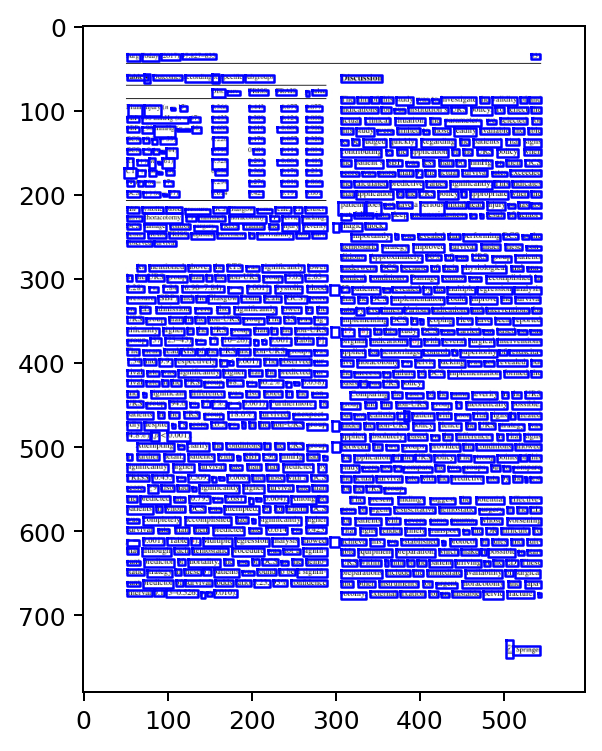

In [26]:
plt.figure(dpi=180)

page.image.plot()
for word in page.words:
    word.segment.plot()

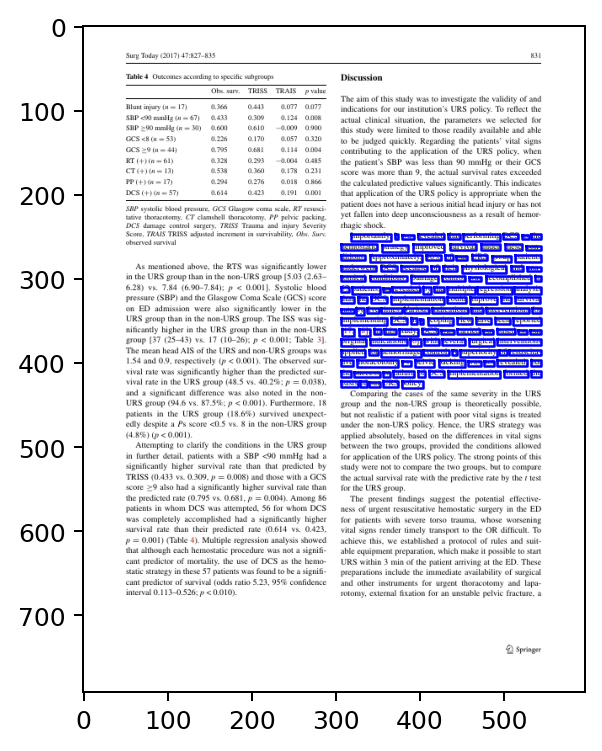

In [27]:
plt.figure(dpi=180)

page.image.plot()
for word in page.blocks[3].words:
    word.segment.plot()

In [28]:
import numpy as np
from img_doc.document.page.extractors.block_extractors import PageAndWordClassificator, BaseRandomWalkClassificator, BaseRandomDeepNodeClassificator

In [29]:
brwc = BaseRandomWalkClassificator(conf={"properties": ["hist_ang", "hist_bold", "hist_dist", "hist_height"], "count_step":0})
pwc = PageAndWordClassificator(brwc, conf={"properties":["place_in_page", "count_word_in_page"], "path_model": "../model_training/models/Hdabh-PLN/"})

In [37]:
doc.pages[0].extract_word_bold()
pwc.classification(doc.pages[0])

In [38]:
for block in doc.pages[0].blocks:
    print(block.label)

list
text
text
list
text
text
header
text
table
no_struct


In [39]:
rez = pwc.page_classification(doc.pages[0])

In [40]:
[np.argmax(r) for r in rez]

[3, 1, 1, 3, 1, 1, 2, 1, 4, 0]

In [34]:
true_label

[1, 1, 1, 1, 1, 1, 1, 1, 4, 2]

/home/daniil/program/python/project/layout_highlighter/imgDoc/env/lib/python3.10/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(
